___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/08/Pareto_Efficient_Frontier_for_the_Markowitz_Portfolio_selection_problem..png" width="300px" height="100px" />


# Proyecto Final

En el proyecto final diseñarás un portafolio de inversión utilizando activos (o ETFs) reales de tu preferencia. Utilizarás todas las herramientas vistas a lo largo del curso para este fin, y después, evaluarás qué tan buena hubiera sido tu inversión de haber invertido en este portafolio.

El proyecto se realizará en equipos de mínimo dos (2) y máximo tres (3) personas. Ni más, ni menos. Para esto, deberán conformar los equipos en este momento, y designar a un miembro del equipo que me envíe un correo con los nombres de los integrantes.
___

In [1]:
# <font color='midnightblue'>

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import scipy.stats as stats
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from plotly.subplots import make_subplots


In [3]:
#import performanceanalytics.charts as pac

In [2]:
tickers = 'VNQ VBK SPY VTI VYM IBM AAL GOOG PFE SONY AAPL VWAGY NFLX AMZN KO'
tickers = tickers.split(' ') #nomás por farolear
tickers

['VNQ',
 'VBK',
 'SPY',
 'VTI',
 'VYM',
 'IBM',
 'AAL',
 'GOOG',
 'PFE',
 'SONY',
 'AAPL',
 'VWAGY',
 'NFLX',
 'AMZN',
 'KO']

In [3]:
start = '2010-01-01'
end = '2015-12-31'

In [4]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None, freq = None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.YahooDailyReader(symbols=tickers, start=start_date, end=end_date, interval = freq).read()['Adj Close']
    # Se ordenan los índices de manera ascendente
    # closes.sort_index(inplace=True)
    return closes

In [5]:
closes = get_adj_closes(tickers, start, freq = 'd')

In [6]:
# Ver estilos gráficos disponibles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [7]:
# Cambiar estilo gráfico a seaborn
matplotlib.style.use('seaborn')

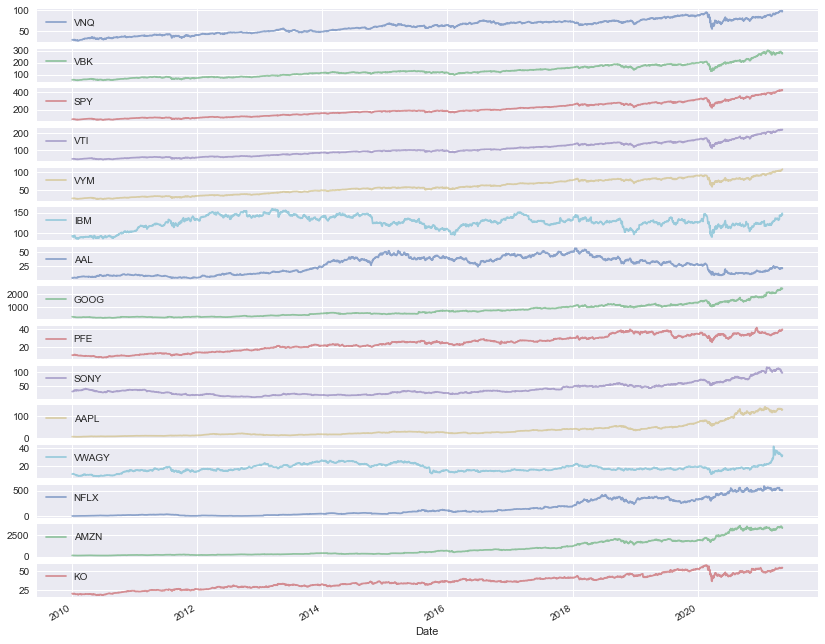

In [8]:
closes.plot(subplots = True, figsize = (14, 12), alpha = 0.6);

In [9]:
closes1 = closes.reset_index()
closes1.head(5)

Symbols       Date        VNQ        VBK        SPY        VTI        VYM  \
0       2010-01-04  28.493959  56.132561  90.790062  46.223129  27.170769   
1       2010-01-05  28.461987  56.416996  91.030411  46.400578  27.170769   
2       2010-01-06  28.410826  56.582134  91.094490  46.465103  27.227226   
3       2010-01-07  28.717825  56.756470  91.479050  46.658669  27.276627   
4       2010-01-08  28.506762  57.086765  91.783432  46.811913  27.326035   

Symbols        IBM       AAL        GOOG        PFE       SONY      AAPL  \
0        92.528694  4.496876  312.204773  11.695276  30.020000  6.583586   
1        91.410950  5.005957  310.829926  11.528468  29.879999  6.594968   
2        90.817116  4.798555  302.994293  11.491397  29.850000  6.490066   
3        90.502762  4.939965  295.940735  11.448153  29.799999  6.478067   
4        91.410950  4.845690  299.885956  11.540824  30.410000  6.521136   

Symbols      VWAGY      NFLX        AMZN         KO  
0        10.407018  7.640000  133.899994  20.098238  
1        10.479625  7.358571  134.690002  19.855110  
2        10.407018  7.617143  132.250000  19.848063  
3        10.649042  7.485714  130.000000  19.798731  
4        10.866863  7.614286  133.520004  19.432291

### Graficar usando paquete `plotly`
` conda install -c plotly plotly `

Documentación [plotly](https://plotly.com/python/)

Documentación [subplots](https://plotly.com/python/subplots/)

In [10]:
# Cambiar motor gráfico a PLOTLY
pd.options.plotting.backend = "plotly"

In [11]:
import plotly.express as px
#df = px.data.stocks()
fig = px.line(closes1, x = "Date", y = closes1.columns,
              hover_data = {"Date": "|%B %d, %Y"},
              title = 'VNQ - VBK - SPY - VTI - VYM - IBM - AAL - GOOG - PFE - SONY - AAPL - VWAGY - NFLX - AMZN - KO')
fig.update_xaxes(
    dtick = "M1",
    tickformat="%b\n%Y")
fig.show()

In [14]:
# Poner por defecto nuevamente matplotlib
pd.options.plotting.backend = "matplotlib"

In [15]:
# Cambiar estilo gráfico a seaborn
matplotlib.style.use('bmh')

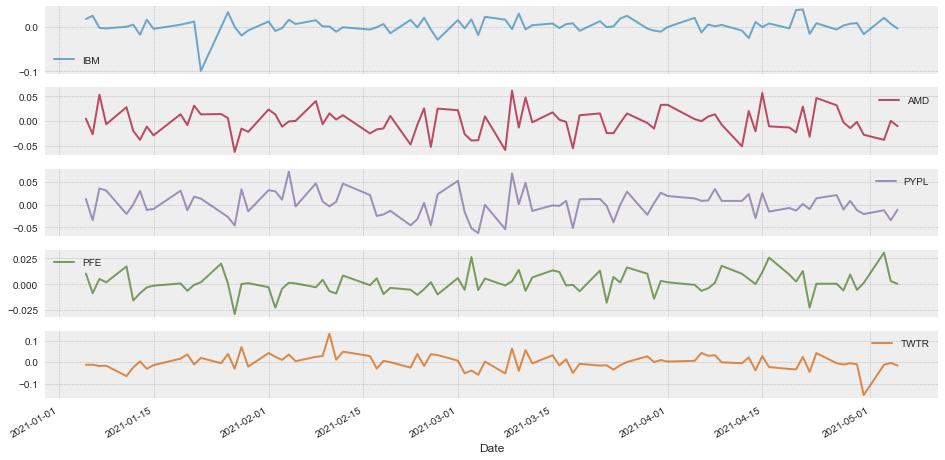

In [16]:
rend = closes.pct_change().dropna()
rend.plot(subplots = True, figsize = (16, 8), alpha = .7);

In [17]:
rend1 = rend.reset_index()
rend1.head(5)

Symbols       Date       IBM       AMD      PYPL       PFE      TWTR
0       2021-01-05  0.017751  0.005092  0.012892  0.010323 -0.011920
1       2021-01-06  0.024972 -0.026302 -0.034396 -0.008605 -0.011507
2       2021-01-07 -0.002320  0.053471  0.036194  0.005153 -0.017461
3       2021-01-08 -0.003566 -0.006095  0.031569  0.001889 -0.016243
4       2021-01-11  0.000389  0.028230 -0.020457  0.017237 -0.064103

In [18]:
pd.options.plotting.backend = "plotly"

In [19]:
fig = px.line(rend1, x = "Date", y = rend1.columns,
              hover_data = {"Date": "|%B %d, %Y"},
              title = 'IBM - AMD - PYPL - PFE - TWTR')
fig.update_xaxes(
    dtick = "M1",
    tickformat="%b\n%Y")
fig.show()

# <font color='midnightblue'> Evolución de la Inversión

In [20]:
cumrets = pd.DataFrame(data = {'Date': rend1['Date'],
                               'IBM': (rend1['IBM'] + 1).cumprod()*2000,
                              'AMD': (rend1['AMD'] + 1).cumprod()*2000,
                              'PYPL': (rend1['PYPL'] + 1).cumprod()*2000,
                              'PFE': (rend1['PFE'] + 1).cumprod()*2000,
                              'TWTR': (rend1['TWTR'] + 1).cumprod()*2000})
cumrets.tail()

Date          IBM          AMD         PYPL          PFE         TWTR
79 2021-04-29  2358.681008  1818.201536  2309.848294  2120.071316  2387.309657
80 2021-04-30  2320.089158  1768.580716  2261.900747  2122.817690  2025.307260
81 2021-05-03  2367.020680  1702.058515  2234.304919  2187.628180  2001.833965
82 2021-05-04  2383.373154  1703.358570  2157.295668  2194.219017  1995.232083
83 2021-05-05  2374.706363  1686.457189  2133.494273  2195.317524  1964.423348

In [34]:
RIBM = cumrets['IBM'].values[-1]
RAMD = cumrets['AMD'].values[-1]
RPYPL = cumrets['PYPL'].values[-1]
RPFE = cumrets['PFE'].values[-1]
RTWTR = cumrets['TWTR'].values[-1]

RPORT = RIBM+RAMD+RPYPL+RPFE+RTWTR
RPORT

10354.39869620631

In [40]:
pct_ret = (RPORT-10000)/10000
np.round(pct_ret*100, 4)

3.544

In [21]:
fig = px.line(cumrets, x = "Date", y = cumrets.columns,
              hover_data = {"Date": "|%B %d, %Y"},
              title = 'IBM - AMD - PYPL - PFE - TWTR')
fig.update_xaxes(
    dtick = "M1",
    tickformat="%b\n%Y")
fig.show()